<a href="https://colab.research.google.com/github/Ixiondbz/House-Prices-Prediction-Advanced-Regression-Techniques-/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Ixiondbz/House-Prices-Prediction-Advanced-Regression-Techniques-/main/train.csv")

In [7]:
df.shape

(1460, 81)

Data Analysis 

In [3]:
featuresWithNA=[features for features in df.columns if df[features].isnull().sum()>0]

In [4]:
featuresWithNA

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [5]:
len(featuresWithNA)

19

In [8]:
for feature in featuresWithNA:
    print(feature,np.round(df[feature].isnull().mean(),3))

LotFrontage 0.177
Alley 0.938
MasVnrType 0.005
MasVnrArea 0.005
BsmtQual 0.025
BsmtCond 0.025
BsmtExposure 0.026
BsmtFinType1 0.025
BsmtFinType2 0.026
FireplaceQu 0.473
GarageType 0.055
GarageYrBlt 0.055
GarageFinish 0.055
GarageQual 0.055
GarageCond 0.055
PoolQC 0.995
Fence 0.808
MiscFeature 0.963


In [1]:
#for feature in featuresWithNA:
#    data=df.copy()
#    data[feature]=np.where(data[feature].isnull(),1,0)
#    data.groupby(feature)['SalePrice'].median().plot.bar()
#    plt.title(feature)
#    plt.show()

In [10]:
numericalFeatures=[feature for feature in df.columns if df[feature].dtypes!='O'] 
print(len(numericalFeatures))

38


In [11]:
81-38

43

In [13]:
numericalFeatures

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [17]:
yearFeatures=[feature for feature in numericalFeatures if 'Yr' in feature or 'Year' in feature]

In [18]:
yearFeatures

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

<AxesSubplot:xlabel='YrSold'>

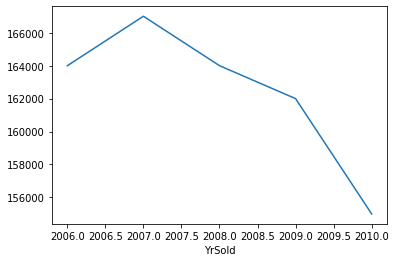

In [20]:
df.groupby('YrSold')['SalePrice'].median().plot()

In [21]:
continuousFeatures=[feature for feature in numericalFeatures if feature not in yearFeatures+['Id']+['SalePrice']]

In [22]:
len(continuousFeatures)

32

In [23]:
discreteFeatures = [feature for feature in numericalFeatures if len(df[feature].unique())<25 and feature not in yearFeatures+['Id']]

In [24]:
len(discreteFeatures)

17

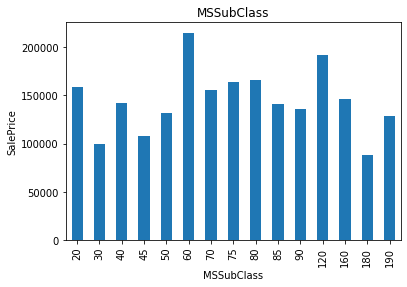

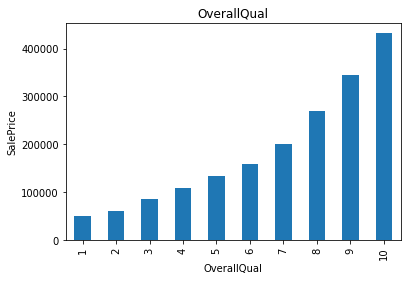

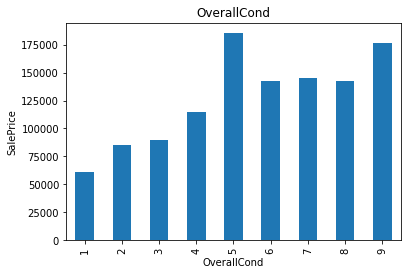

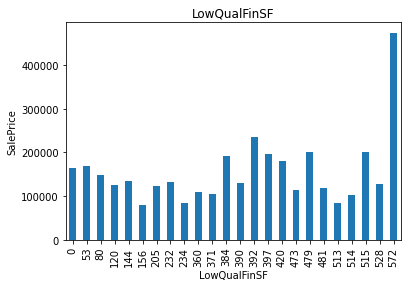

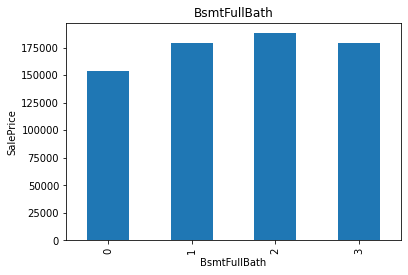

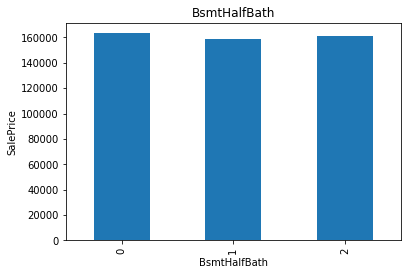

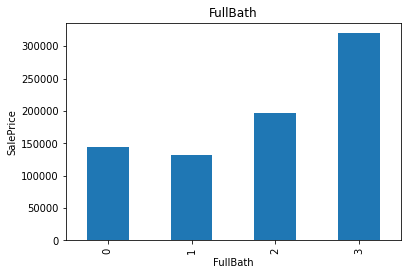

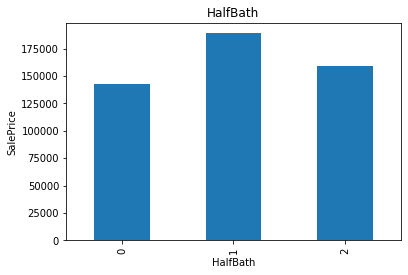

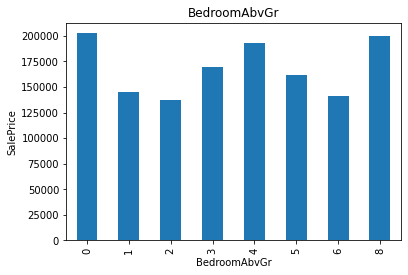

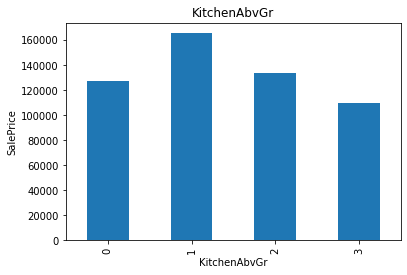

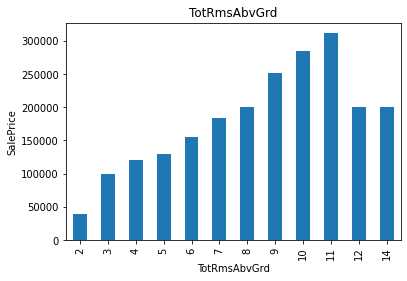

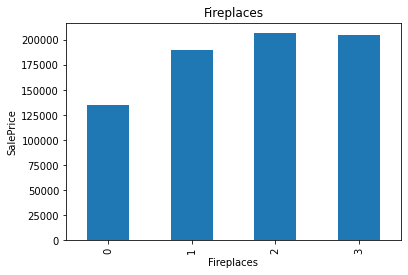

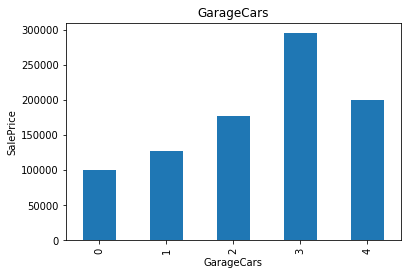

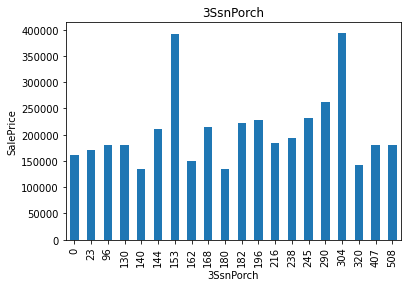

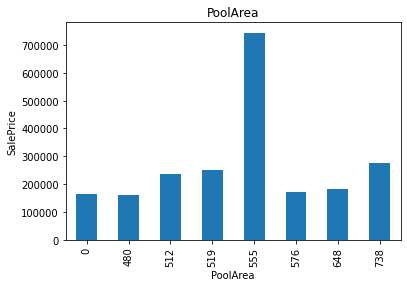

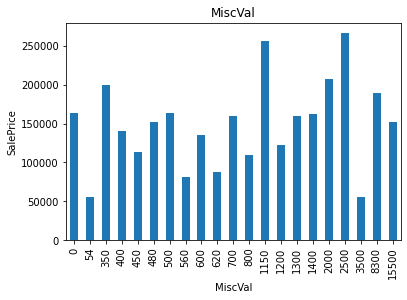

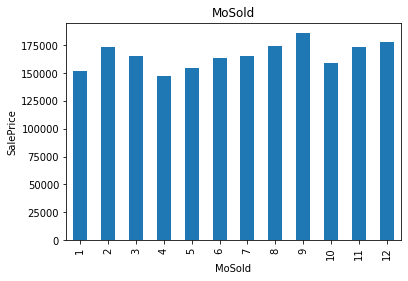

In [25]:
for feature in discreteFeatures:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [26]:
continuousFeatures=[feature for feature in numericalFeatures if feature not in discreteFeatures+yearFeatures+['Id']+['SalePrice']]

In [27]:
len(continuousFeatures)

15

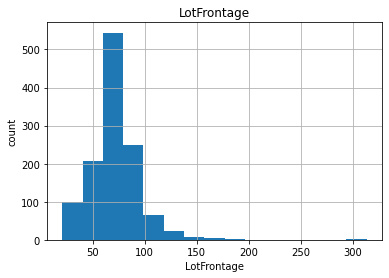

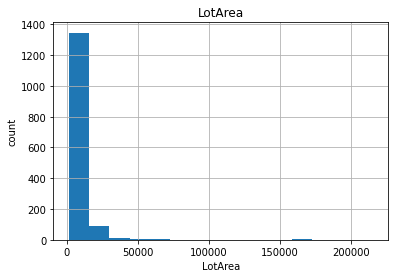

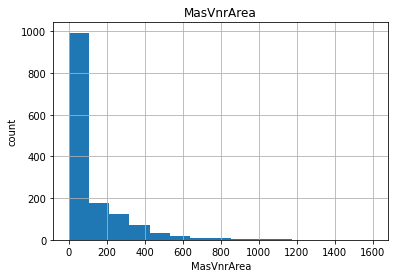

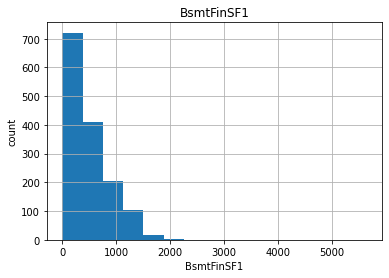

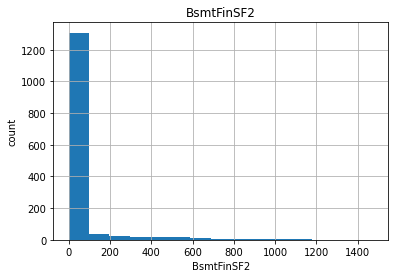

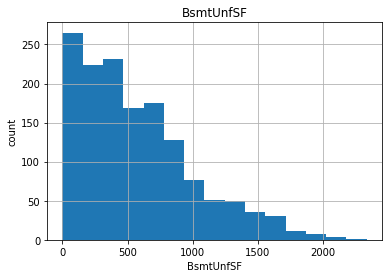

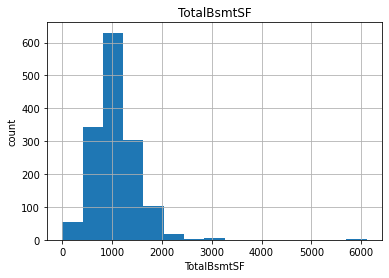

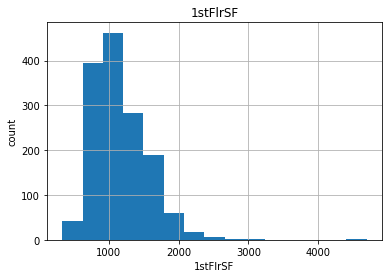

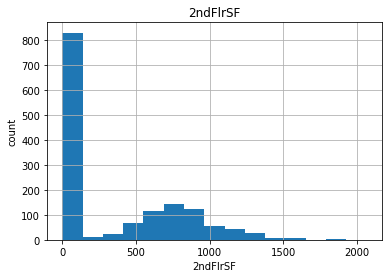

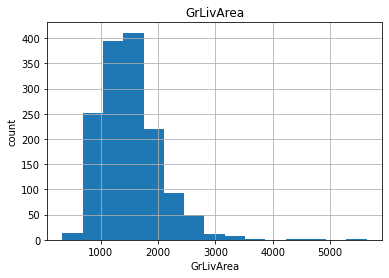

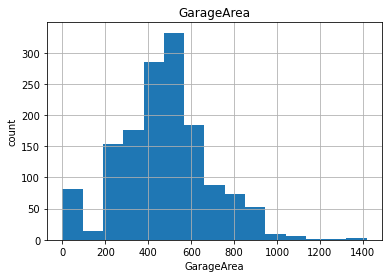

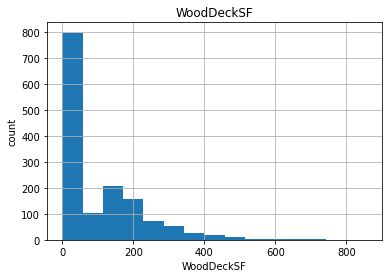

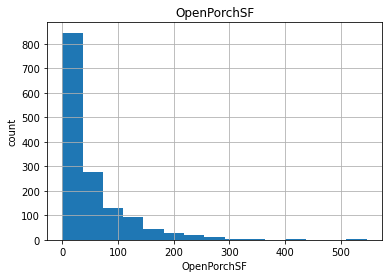

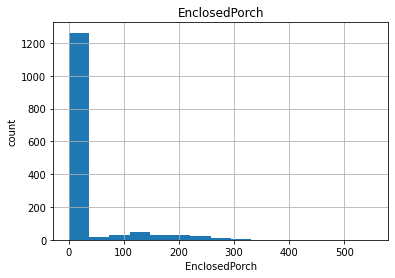

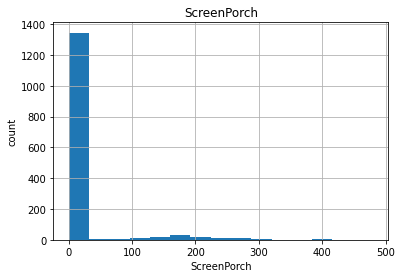

In [28]:
for feature in continuousFeatures:
    data=df.copy()
    data[feature].hist(bins=15)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

In [29]:
df.shape

(1460, 81)

In [30]:
df['1stFlrSF'].dtype

dtype('int64')

In [32]:
df.head().dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [33]:
for feature in df.columns:
    print(feature, df[feature].dtype)

Id int64
MSSubClass int64
MSZoning object
LotFrontage float64
LotArea int64
Street object
Alley object
LotShape object
LandContour object
Utilities object
LotConfig object
LandSlope object
Neighborhood object
Condition1 object
Condition2 object
BldgType object
HouseStyle object
OverallQual int64
OverallCond int64
YearBuilt int64
YearRemodAdd int64
RoofStyle object
RoofMatl object
Exterior1st object
Exterior2nd object
MasVnrType object
MasVnrArea float64
ExterQual object
ExterCond object
Foundation object
BsmtQual object
BsmtCond object
BsmtExposure object
BsmtFinType1 object
BsmtFinSF1 int64
BsmtFinType2 object
BsmtFinSF2 int64
BsmtUnfSF int64
TotalBsmtSF int64
Heating object
HeatingQC object
CentralAir object
Electrical object
1stFlrSF int64
2ndFlrSF int64
LowQualFinSF int64
GrLivArea int64
BsmtFullBath int64
BsmtHalfBath int64
FullBath int64
HalfBath int64
BedroomAbvGr int64
KitchenAbvGr int64
KitchenQual object
TotRmsAbvGrd int64
Functional object
Fireplaces int64
FireplaceQu object

In [36]:
for feature in df.columns:
    if df[feature].dtype=='O':
        print(feature)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [37]:
for feature in df.columns:
    if df[feature].dtype!='O':
        print(feature, df[feature].dtype)

Id int64
MSSubClass int64
LotFrontage float64
LotArea int64
OverallQual int64
OverallCond int64
YearBuilt int64
YearRemodAdd int64
MasVnrArea float64
BsmtFinSF1 int64
BsmtFinSF2 int64
BsmtUnfSF int64
TotalBsmtSF int64
1stFlrSF int64
2ndFlrSF int64
LowQualFinSF int64
GrLivArea int64
BsmtFullBath int64
BsmtHalfBath int64
FullBath int64
HalfBath int64
BedroomAbvGr int64
KitchenAbvGr int64
TotRmsAbvGrd int64
Fireplaces int64
GarageYrBlt float64
GarageCars int64
GarageArea int64
WoodDeckSF int64
OpenPorchSF int64
EnclosedPorch int64
3SsnPorch int64
ScreenPorch int64
PoolArea int64
MiscVal int64
MoSold int64
YrSold int64
SalePrice int64


In [38]:
for feature in df.columns:
    if df[feature].dtype=='O' and df[feature].isnull().sum()>0:
        print(feature,df[feature].isnull().sum())

Alley 1369
MasVnrType 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [39]:
for feature in df.columns:
    if df[feature].dtype!='O' and df[feature].isnull().sum()>0:
        print(feature,df[feature].isnull().sum())

LotFrontage 259
MasVnrArea 8
GarageYrBlt 81


### Filling NA values of Catergorical Features

In [40]:
df.drop(['Alley'],axis=1,inplace=True)
df.drop(['MiscFeature'],axis=1,inplace=True)
df.drop(['PoolQC'],axis=1,inplace=True)
df.drop(['Fence'],axis=1,inplace=True)

In [43]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [44]:
df['MasVnrType'].isna().sum()

8

In [47]:
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

In [48]:
for feature in df.columns:
    if df[feature].dtype=='O' and df[feature].isnull().sum()>0:
        print(feature,df[feature].isnull().sum())

BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageFinish 81
GarageQual 81
GarageCond 81


In [49]:
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [50]:
for feature in df.columns:
    if df[feature].dtype=='O' and df[feature].isnull().sum()>0:
        df[feature] = df[feature].fillna(df[feature].mode()[0])

In [51]:
for feature in df.columns:
    if df[feature].dtype=='O' and df[feature].isnull().sum()>0:
        print(feature,df[feature].isnull().sum())

### Filling missing values of Numerical Features 

In [52]:
for feature in df.columns:
    if df[feature].dtype!='O' and df[feature].isnull().sum()>0:
        print(feature,df[feature].isnull().sum())

LotFrontage 259
MasVnrArea 8
GarageYrBlt 81


In [53]:
for feature in df.columns:
    if df[feature].dtype!='O' and df[feature].isnull().sum()>0:
        df[feature] = df[feature].fillna(df[feature].mean())

In [54]:
for feature in df.columns:
    if df[feature].dtype!='O' and df[feature].isnull().sum()>0:
        print(feature,df[feature].isnull().sum())

<AxesSubplot:>

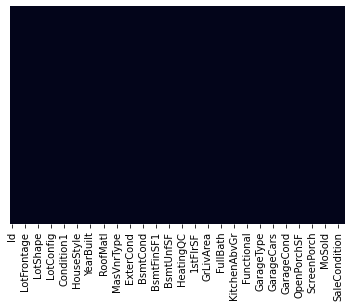

In [55]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

### Id values don't contribute to prediction 

In [56]:
df.drop(['Id'],axis=1,inplace=True)

### Converting Categorical Variables to Numerical Variables

In [57]:
Categorical = [feature for feature in df.columns if df[feature].dtype=='O']
len(Categorical)

In [59]:
Numerical = [feature for feature in df.columns if df[feature].dtype!='O']
len(Numerical)

In [146]:
#for feature in Categorical:
#  data=df.copy()
#  data.groupby(feature)['SalePrice'].median().plot.bar()
#  plt.xlabel(feature)
#  plt.ylabel('SalePrice')
#  plt.title(feature)
#  plt.show()

In [63]:
from sklearn.preprocessing import OrdinalEncoder
df_bn = df.copy()

In [64]:
df_bn['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [65]:
zoning_order = ['FV', 'RL', 'RH', 'RM', 'C (all)']
enco = OrdinalEncoder (categories=[zoning_order])
enco.fit(df_bn[['MSZoning']])
final=pd.DataFrame(enco.transform(df_bn[['MSZoning']]))
df_bn['MSZoning']=final

In [68]:
df_bn['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [69]:
street_order = ['Pave', 'Grvl']
enco = OrdinalEncoder (categories=[street_order])
enco.fit(df_bn[['Street']])
final=pd.DataFrame(enco.transform(df_bn[['Street']]))
df_bn['Street']=final
df_bn['Street'].unique()

array([0., 1.])

In [70]:
df_bn['LotShape'].unique()
lshape_order = ['IR2', 'IR3','IR1','Reg']
enco = OrdinalEncoder (categories=[lshape_order])
enco.fit(df_bn[['LotShape']])
final=pd.DataFrame(enco.transform(df_bn[['LotShape']]))
df_bn['LotShape']=final

In [71]:
df_bn['LandContour'].unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

In [72]:
lcont_order = ['HLS', 'Low','Lvl','Bnk']
enco = OrdinalEncoder (categories=[lcont_order])
enco.fit(df_bn[['LandContour']])
final=pd.DataFrame(enco.transform(df_bn[['LandContour']]))
df_bn['LandContour']=final

In [73]:
df_bn['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [74]:
util_order = ['AllPub', 'NoSeWa']
enco = OrdinalEncoder (categories=[util_order])
enco.fit(df_bn[['Utilities']])
final=pd.DataFrame(enco.transform(df_bn[['Utilities']]))
df_bn['Utilities']=final

In [75]:
df_bn['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [76]:
lcon_order = ['CulDSac', 'FR3', 'FR2', 'Inside', 'Corner']
enco = OrdinalEncoder (categories=[lcon_order])
enco.fit(df_bn[['LotConfig']])
final=pd.DataFrame(enco.transform(df_bn[['LotConfig']]))
df_bn['LotConfig']=final

In [77]:
df_bn['LandSlope'].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [78]:
lslope_order = ['Mod', 'Sev', 'Gtl']
enco = OrdinalEncoder (categories=[lslope_order])
enco.fit(df_bn[['LandSlope']])
final=pd.DataFrame(enco.transform(df_bn[['LandSlope']]))
df_bn['LandSlope']=final

In [79]:
df_bn['Condition1'].unique()

array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object)

In [80]:
con1_order = ['PosA', 'PosN', 'RRNn', 'RRNe', 'RRAn', 'Norm', 'RRAe', 'Feedr', 'Artery']
enco = OrdinalEncoder (categories=[con1_order])
enco.fit(df_bn[['Condition1']])
final=pd.DataFrame(enco.transform(df_bn[['Condition1']]))
df_bn['Condition1']=final

In [81]:
df_bn['Condition2'].unique()

array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
      dtype=object)

In [82]:
con2_order = ['PosA', 'PosN', 'RRAe', 'Norm', 'RRAn', 'Feedr', 'Artery', 'RRNn']
enco = OrdinalEncoder (categories=[con2_order])
enco.fit(df_bn[['Condition2']])
final=pd.DataFrame(enco.transform(df_bn[['Condition2']]))
df_bn['Condition2']=final

In [83]:
df_bn['BldgType'].unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [84]:
bldg_order = ['TwnhsE', '1Fam', 'Twnhs', 'Duplex', '2fmCon']
enco = OrdinalEncoder (categories=[bldg_order])
enco.fit(df_bn[['BldgType']])
final=pd.DataFrame(enco.transform(df_bn[['BldgType']]))
df_bn['BldgType']=final

In [85]:
df_bn['HouseStyle'].unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [86]:
hstyle_order = ['2.5Fin', '2Story', 'SLvl', '1Story', '2.5Unf', 'SFoyer', '1.5Fin', '1.5Unf']
enco = OrdinalEncoder (categories=[hstyle_order])
enco.fit(df_bn[['HouseStyle']])
final=pd.DataFrame(enco.transform(df_bn[['HouseStyle']]))
df_bn['HouseStyle']=final

In [87]:
df_bn['RoofStyle'].unique()

array(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], dtype=object)

In [88]:
rstyle_order = ['Shed', 'Flat','Hip','Mansard','Gable','Gambrel']

In [89]:
enco = OrdinalEncoder (categories=[rstyle_order])
enco.fit(df_bn[['RoofStyle']])
final=pd.DataFrame(enco.transform(df_bn[['RoofStyle']]))
df_bn['RoofStyle']=final

In [90]:
df_bn['RoofMatl'].unique()

array(['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv',
       'Roll', 'ClyTile'], dtype=object)

In [91]:
rmatl_order = ['WdShngl', 'WdShake','Membran','Metal','Tar&Grv','CompShg','ClyTile','Roll']
enco = OrdinalEncoder (categories=[rmatl_order])
enco.fit(df_bn[['RoofMatl']])
final=pd.DataFrame(enco.transform(df_bn[['RoofMatl']]))
df_bn['RoofMatl']=final

In [92]:
df_bn['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [93]:
masvnr_order = ['Stone', 'BrkFace','None','BrkCmn']
enco = OrdinalEncoder (categories=[masvnr_order])
enco.fit(df_bn[['MasVnrType']])
final=pd.DataFrame(enco.transform(df_bn[['MasVnrType']]))
df_bn['MasVnrType']=final

In [94]:
df_bn['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [95]:
exqual_order = ['Ex','Gd','TA','Fa']
enco = OrdinalEncoder (categories=[exqual_order])
enco.fit(df_bn[['ExterQual']])
final=pd.DataFrame(enco.transform(df_bn[['ExterQual']]))
df_bn['ExterQual']=final

In [96]:
df_bn['ExterCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [97]:
xcond_order = ['TA','Ex', 'Gd','Fa','Po']
enco = OrdinalEncoder (categories=[xcond_order])
enco.fit(df_bn[['ExterCond']])
final=pd.DataFrame(enco.transform(df_bn[['ExterCond']]))
df_bn['ExterCond']=final

In [98]:
df_bn['Foundation'].unique()

array(['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'], dtype=object)

In [99]:
foundation_order = ['PConc', 'Wood','CBlock','Stone','BrkTil','Slab']
enco = OrdinalEncoder (categories=[foundation_order])
enco.fit(df_bn[['Foundation']])
final=pd.DataFrame(enco.transform(df_bn[['Foundation']]))
df_bn['Foundation']=final

In [100]:
df_bn['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [101]:
bqual_order = ['Ex','Gd','TA','Fa']
enco = OrdinalEncoder (categories=[bqual_order])
enco.fit(df_bn[['BsmtQual']])
final=pd.DataFrame(enco.transform(df_bn[['BsmtQual']]))
df_bn['BsmtQual']=final

In [102]:
df_bn['BsmtCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po'], dtype=object)

In [103]:
bcond_order = ['Gd','TA','Fa','Po']
enco = OrdinalEncoder (categories=[bcond_order ])
enco.fit(df_bn[['BsmtCond']])
final=pd.DataFrame(enco.transform(df_bn[['BsmtCond']]))
df_bn['BsmtCond']=final

In [104]:
df_bn['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av'], dtype=object)

In [105]:
bexp_order = ['Gd','Av','Mn','No']
enco = OrdinalEncoder (categories=[bexp_order])
enco.fit(df_bn[['BsmtExposure']])
final=pd.DataFrame(enco.transform(df_bn[['BsmtExposure']]))
df_bn['BsmtExposure']=final

In [106]:
df_bn['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'LwQ'], dtype=object)

In [107]:
bft_order = ['GLQ','Unf','ALQ','Rec','BLQ','LwQ']
enco = OrdinalEncoder (categories=[bft_order])
enco.fit(df_bn[['BsmtFinType1']])
final=pd.DataFrame(enco.transform(df_bn[['BsmtFinType1']]))
df_bn['BsmtFinType1']=final

In [108]:
df_bn['BsmtFinType2'].unique()

array(['Unf', 'BLQ', 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [109]:
bft2_order = ['GLQ','ALQ','Unf','LwQ','Rec','BLQ']
enco = OrdinalEncoder (categories=[bft2_order])
enco.fit(df_bn[['BsmtFinType2']])
final=pd.DataFrame(enco.transform(df_bn[['BsmtFinType2']]))
df_bn['BsmtFinType2']=final

In [110]:
df_bn['Heating'].unique()

array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor'], dtype=object)

In [111]:
heat_order = ['GasA','GasW','OthW','Wall','Grav','Floor']
enco = OrdinalEncoder (categories=[heat_order])
enco.fit(df_bn[['Heating']])
df_bn['Heating']=final

In [112]:
df_bn['HeatingQC'].unique()

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

In [113]:
heatqc_order = ['Ex','Gd','TA','Fa','Po']
enco = OrdinalEncoder (categories=[heatqc_order])
enco.fit(df_bn[['HeatingQC']])
final=pd.DataFrame(enco.transform(df_bn[['HeatingQC']]))
df_bn['HeatingQC']=final

In [114]:
df_bn['CentralAir'].unique()

array(['Y', 'N'], dtype=object)

In [115]:
cair_order = ['Y','N']
enco = OrdinalEncoder (categories=[cair_order])
enco.fit(df_bn[['CentralAir']])
final=pd.DataFrame(enco.transform(df_bn[['CentralAir']]))
df_bn['CentralAir']=final

In [116]:
df_bn['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [117]:
elec_order = ['SBrkr','FuseA', 'FuseF','FuseP','Mix']
enco = OrdinalEncoder (categories=[elec_order])
enco.fit(df_bn[['Electrical']])
final=pd.DataFrame(enco.transform(df_bn[['Electrical']]))
df_bn['Electrical']=final

In [118]:
df_bn['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [119]:
kqual_order = ['Ex','Gd', 'TA','Fa']
enco = OrdinalEncoder (categories=[kqual_order])
enco.fit(df_bn[['KitchenQual']])
final=pd.DataFrame(enco.transform(df_bn[['KitchenQual']]))
df_bn['KitchenQual']=final

In [120]:
df_bn['Functional'].unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], dtype=object)

In [121]:
fun_order = ['Typ','Maj1','Min2','Min1','Mod','Sev','Maj2']
enco = OrdinalEncoder (categories=[fun_order])
enco.fit(df_bn[['Functional']])
final=pd.DataFrame(enco.transform(df_bn[['Functional']]))
df_bn['Functional']=final

In [122]:
df_bn['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'Basment', '2Types'],
      dtype=object)

In [123]:
gtyp_order = ['BuiltIn','Attchd','2Types','Basment','Detchd','CarPort']
enco = OrdinalEncoder (categories=[gtyp_order])
enco.fit(df_bn[['GarageType']])
final=pd.DataFrame(enco.transform(df_bn[['GarageType']]))
df_bn['GarageType']=final

In [124]:
df_bn['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin'], dtype=object)

In [125]:
gfin_order = ['Fin','RFn','Unf']
enco = OrdinalEncoder (categories=[gfin_order])
enco.fit(df_bn[['GarageFinish']])
final=pd.DataFrame(enco.transform(df_bn[['GarageFinish']]))
df_bn['GarageFinish']=final

In [126]:
df_bn['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)

In [127]:
gqa_order = ['Gd','TA','Ex','Fa','Po']
enco = OrdinalEncoder (categories=[gqa_order])
enco.fit(df_bn[['GarageQual']])
final=pd.DataFrame(enco.transform(df_bn[['GarageQual']]))
df_bn['GarageQual']=final

In [128]:
df_bn['GarageCond'].unique()

array(['TA', 'Fa', 'Gd', 'Po', 'Ex'], dtype=object)

In [129]:
gcond_order = ['TA','Gd','Ex','Fa','Po']
enco = OrdinalEncoder (categories=[gcond_order])
enco.fit(df_bn[['GarageCond']])
final=pd.DataFrame(enco.transform(df_bn[['GarageCond']]))
df_bn['GarageCond']=final

In [130]:
df_bn['PavedDrive'].unique()

array(['Y', 'N', 'P'], dtype=object)

In [131]:
pdrive_order = ['Y','P','N']
enco = OrdinalEncoder (categories=[pdrive_order])
enco.fit(df_bn[['PavedDrive']])
final=pd.DataFrame(enco.transform(df_bn[['PavedDrive']]))
df_bn['PavedDrive']=final

In [132]:
df_bn['SaleType'].unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

In [133]:
sltyp_order = ['Con','New','CWD','WD','COD','ConLw','ConLD','ConLI','Oth']
enco = OrdinalEncoder (categories=[sltyp_order])
enco.fit(df_bn[['SaleType']])
final=pd.DataFrame(enco.transform(df_bn[['SaleType']]))
df_bn['SaleType']=final

In [134]:
df_bn['SaleCondition'].unique()
slcnd_order = ['Partial','Normal','Alloca','Family','Abnorml','AdjLand']
enco = OrdinalEncoder (categories=[slcnd_order])
enco.fit(df_bn[['SaleCondition']])
final=pd.DataFrame(enco.transform(df_bn[['SaleCondition']]))
df_bn['SaleCondition']=final

In [135]:
df.groupby(['Neighborhood'])['SalePrice'].aggregate(np.median).reset_index().sort_values('SalePrice')['Neighborhood']

10    MeadowV
9      IDOTRR
2      BrDale
17    OldTown
7     Edwards
3     BrkSide
19     Sawyer
1     Blueste
18      SWISU
12      NAmes
13    NPkVill
11    Mitchel
20    SawyerW
8     Gilbert
14     NWAmes
0     Blmngtn
5     CollgCr
4     ClearCr
6     Crawfor
24    Veenker
21    Somerst
23     Timber
22    StoneBr
15    NoRidge
16    NridgHt
Name: Neighborhood, dtype: object

<AxesSubplot:>

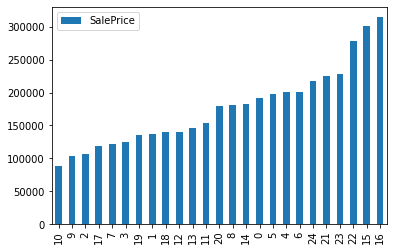

In [136]:
df.groupby(['Neighborhood'])['SalePrice'].aggregate(np.median).reset_index().sort_values('SalePrice').plot.bar()

In [137]:
neighb_order = ['MeadowV','IDOTRR','BrDale','OldTown','Edwards','BrkSide','Sawyer','Blueste','SWISU','NAmes','NPkVill','Mitchel','SawyerW','Gilbert','NWAmes','Blmngtn','CollgCr','ClearCr','Crawfor','Veenker','Somerst','Timber','StoneBr','NoRidge','NridgHt']
neighb_order.reverse()
enco = OrdinalEncoder (categories=[neighb_order])
enco.fit(df_bn[['Neighborhood']])
final=pd.DataFrame(enco.transform(df_bn[['Neighborhood']]))
df_bn['Neighborhood']=final

In [138]:
df_bn.groupby(['Exterior1st'])['SalePrice'].aggregate(np.median).reset_index().sort_values('SalePrice')['Exterior1st']

2     BrkComm
1     AsphShn
4      CBlock
0     AsbShng
14    WdShing
13    Wd Sdng
8     MetalSd
11     Stucco
6     HdBoard
3     BrkFace
9     Plywood
12    VinylSd
5     CemntBd
10      Stone
7     ImStucc
Name: Exterior1st, dtype: object

In [139]:
exterior1st_order = ['BrkComm','AsphShn','CBlock','AsbShng','WdShing','Wd Sdng','MetalSd','Stucco','HdBoard','BrkFace','Plywood','VinylSd','CemntBd','Stone','ImStucc']
exterior1st_order.reverse()
enco = OrdinalEncoder (categories=[exterior1st_order])
enco.fit(df_bn[['Exterior1st']])
final=pd.DataFrame(enco.transform(df_bn[['Exterior1st']]))
df_bn['Exterior1st']=final

In [140]:
exterior2nd_order = ['CBlock','AsbShng','Wd Sdng','Wd Shng','MetalSd','AsphShn','Stucco','Brk Cmn','HdBoard','BrkFace','Plywood','Stone','ImStucc','VinylSd','CmentBd','Other']
exterior2nd_order.reverse()
enco = OrdinalEncoder (categories=[exterior2nd_order])
enco.fit(df_bn[['Exterior2nd']])
final=pd.DataFrame(enco.transform(df_bn[['Exterior2nd']]))
df_bn['Exterior2nd']=final

In [141]:
df.groupby(['FireplaceQu'])['SalePrice'].aggregate(np.median).reset_index().sort_values('SalePrice')['FireplaceQu']

3    Po
2    Gd
1    Fa
4    TA
0    Ex
Name: FireplaceQu, dtype: object

In [142]:
fireplace_order = ['NA','Po','Gd','Fa','TA','Ex']
fireplace_order.reverse()
enco = OrdinalEncoder (categories=[fireplace_order])
enco.fit(df_bn[['FireplaceQu']])
final=pd.DataFrame(enco.transform(df_bn[['FireplaceQu']]))
df_bn['FireplaceQu']=final

--------------------------------------------------------------------

In [143]:
for feature in df_bn.columns:
    if df_bn[feature].dtype=='O':
        print(feature)

In [144]:
df_bn

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,1.0,65.0,8450,0.0,3.0,2.0,0.0,3.0,2.0,...,0,0,0,0,0,2,2008,3.0,1.0,208500
1,20,1.0,80.0,9600,0.0,3.0,2.0,0.0,2.0,2.0,...,0,0,0,0,0,5,2007,3.0,1.0,181500
2,60,1.0,68.0,11250,0.0,2.0,2.0,0.0,3.0,2.0,...,0,0,0,0,0,9,2008,3.0,1.0,223500
3,70,1.0,60.0,9550,0.0,2.0,2.0,0.0,4.0,2.0,...,272,0,0,0,0,2,2006,3.0,4.0,140000
4,60,1.0,84.0,14260,0.0,2.0,2.0,0.0,2.0,2.0,...,0,0,0,0,0,12,2008,3.0,1.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,1.0,62.0,7917,0.0,3.0,2.0,0.0,3.0,2.0,...,0,0,0,0,0,8,2007,3.0,1.0,175000
1456,20,1.0,85.0,13175,0.0,3.0,2.0,0.0,3.0,2.0,...,0,0,0,0,0,2,2010,3.0,1.0,210000
1457,70,1.0,66.0,9042,0.0,3.0,2.0,0.0,3.0,2.0,...,0,0,0,0,2500,5,2010,3.0,1.0,266500
1458,20,1.0,68.0,9717,0.0,3.0,2.0,0.0,3.0,2.0,...,112,0,0,0,0,4,2010,3.0,1.0,142125


In [145]:
#df_bn.to_csv('train_numerical.csv',index=False)